/var/folders/6p/jzv8hq9s3fn7xnklrsnvw0080000gn/T/ipykernel_18063/3252608388.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Text(0.5, 1.0, 'Log Population Density Map')

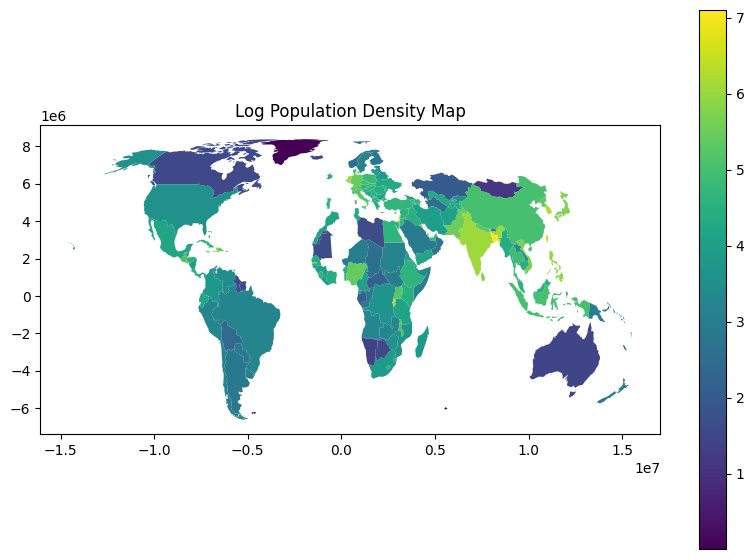

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_gdf


min_longitude1, max_longitude1 = 0, 180   
min_longitude2, max_longitude2 = -180, 0  


filtered_gdf1 = world_gdf[(world_gdf.geometry.bounds.minx >= min_longitude1) & (world_gdf.geometry.bounds.maxx <= max_longitude1)]


filtered_gdf2 = world_gdf[(world_gdf.geometry.bounds.minx >= min_longitude2) & (world_gdf.geometry.bounds.maxx <= max_longitude2)]


filtered_gdf = pd.concat([filtered_gdf1, filtered_gdf2])


filtered_gdf.crs

filtered_gdf = filtered_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")


filtered_gdf['log_pop_density'] = np.log1p(filtered_gdf.pop_est / filtered_gdf.area * 10**6)
filtered_gdf.sort_values(by="log_pop_density", ascending = False)


figsize = (10,7)

ax = filtered_gdf.plot("log_pop_density", legend=True, figsize=figsize)

ax.set_title("Log Population Density Map")
